In [90]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

# Database connection details
DB_CONFIG = {
    "dbname": os.getenv("DB_NAME"),
    "user": os.getenv("DB_USER"),
    "password": os.getenv("DB_PASSWORD"),
    "host": os.getenv("DB_HOST"),
    "port": os.getenv("DB_PORT")
}

def connect_db():
    conn = psycopg2.connect(**DB_CONFIG)
    return conn

## 1. Sales Performance Analysis

Data Preview:


,product_name,total_units_sold,total_gross_sales,total_discounts,total_net_sales,total_gross_profit,average_gross_profit_margin
0,Apples,7000,14000.0,700.0,12950.0,4900.0,0.3684
1,Frozen Peas,5600,10080.0,420.0,9520.0,4760.0,0.4928
2,Whole Milk,3500,5250.0,350.0,4900.0,2100.0,0.4286
3,Skim Milk,2100,2940.0,140.0,2800.0,1330.0,0.4750
4,Whole Wheat Bread,4200,5040.0,210.0,4760.0,1330.0,0.2754



Summary Statistics:


,total_units_sold,total_gross_sales,total_discounts,total_net_sales,total_gross_profit,average_gross_profit_margin
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,4480.000000,7462.000000,364.000000,6986.000000,2884.000000,0.408040
std,1891.295852,4494.632354,218.013761,4147.876565,1804.724356,0.088396
min,2100.000000,2940.000000,140.000000,2800.000000,1330.000000,0.275400
25%,3500.000000,5040.000000,210.000000,4760.000000,1330.000000,0.368400
50%,4200.000000,5250.000000,350.000000,4900.000000,2100.000000,0.428600
75%,5600.000000,10080.000000,420.000000,9520.000000,4760.000000,0.475000
max,7000.000000,14000.000000,700.000000,12950.000000,4900.000000,0.492800


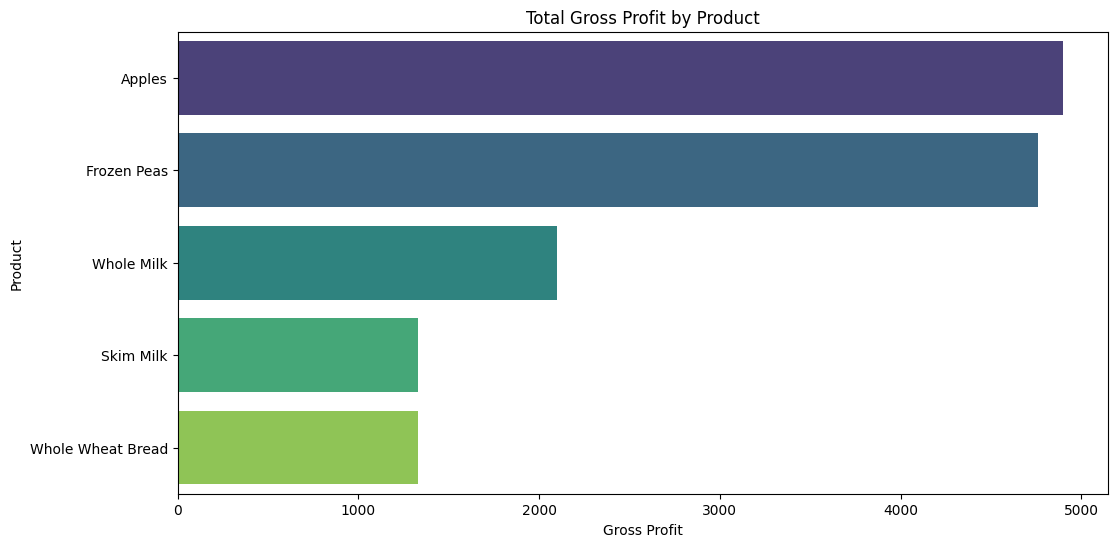


Validation Checks:
Number of products: 5
Total gross sales: $37,310.00
Average profit margin: 40.80%


In [23]:
def get_sales_data():
    query = """
    SELECT 
        p.product_name,
        SUM(s.units_sold) AS total_units_sold,
        SUM(s.gross_sales) AS total_gross_sales,
        SUM(s.discount) AS total_discounts,
        SUM(s.net_sales_after_returns) AS total_net_sales,
        SUM(s.gross_profit) AS total_gross_profit,
        AVG(s.gross_profit_margin) AS average_gross_profit_margin
    FROM Sales s
    JOIN Products p ON s.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY total_gross_profit DESC;
    """
    conn = connect_db()
    df = pd.read_sql_query(query, conn)
    return df

# Get data
sales_df = get_sales_data()

# Display first few rows
print("Data Preview:")
display(sales_df.head())

# Basic statistics
print("\nSummary Statistics:")
display(sales_df.describe())

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total_gross_profit', y='product_name', hue='product_name', 
            data=sales_df, palette="viridis", legend=False)
plt.title('Total Gross Profit by Product')
plt.xlabel('Gross Profit')
plt.ylabel('Product')
plt.show()

# Validation checks
print("\nValidation Checks:")
print(f"Number of products: {len(sales_df)}")
print(f"Total gross sales: ${sales_df['total_gross_sales'].sum():,.2f}")
print(f"Average profit margin: {sales_df['average_gross_profit_margin'].mean():.2%}")

## 2. Promotion Effectiveness Analysis

Promotion Data Preview:


,product_name,total_sales,total_discount,total_profit,total_gross_sales,average_profit_margin
0,Apples,8000.0,400.0,2800.0,8000.0,0.3684
1,Frozen Peas,5760.0,240.0,2720.0,5760.0,0.4928
2,Whole Milk,3000.0,200.0,1200.0,3000.0,0.4286
3,Whole Wheat Bread,2880.0,120.0,760.0,2880.0,0.2754
4,Skim Milk,1680.0,80.0,760.0,1680.0,0.4750



Promotion Impact Analysis:
Average discount rate: 4.88%
Total promotional sales: $21,320.00


C:\Users\Intel\AppData\Local\Temp\ipykernel_62824\2446176253.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='profit_margin', y='product_name', data=promo_df, ax=ax1, palette="coolwarm")
C:\Users\Intel\AppData\Local\Temp\ipykernel_62824\2446176253.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_margin', y='product_name', data=promo_df, ax=ax2, palette="coolwarm")


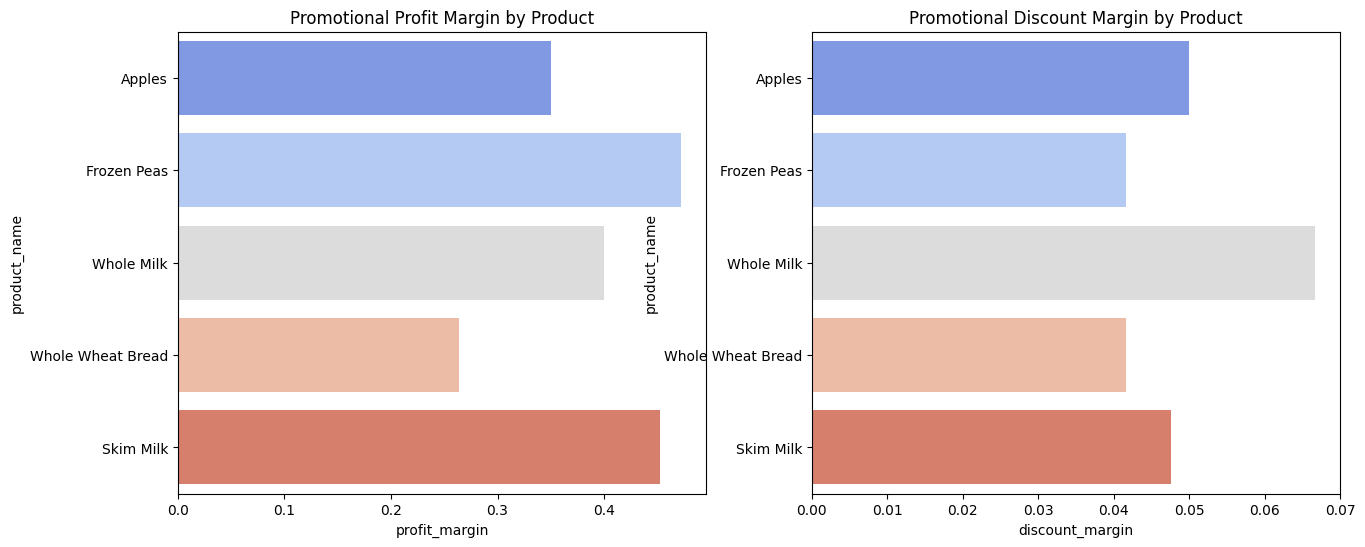

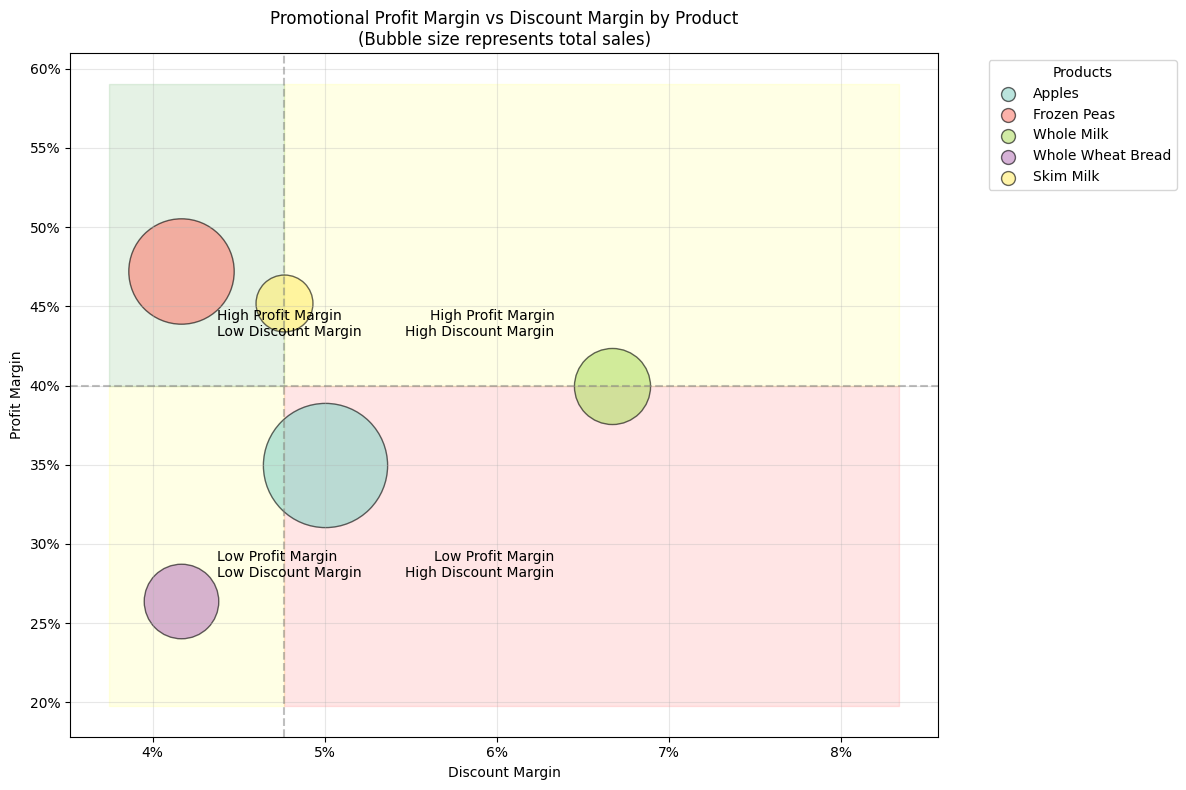

Sales Data Preview:


,product_name,total_units_sold,total_gross_sales,total_discounts,total_net_sales,total_gross_profit,average_gross_profit_margin,average_inventory,cost_of_goods_sold,accounts_receivable,accounts_payable
0,Apples,4000,8000.0,400.0,7400.0,2800.0,0.3684,0.0,4800.0,900.0,450.0
1,Frozen Peas,3200,5760.0,240.0,5440.0,2720.0,0.4928,0.0,2800.0,600.0,300.0
2,Whole Milk,2000,3000.0,200.0,2800.0,1200.0,0.4286,0.0,1600.0,300.0,150.0
3,Skim Milk,1200,1680.0,80.0,1600.0,760.0,0.4750,0.0,840.0,240.0,90.0
4,Whole Wheat Bread,2400,2880.0,120.0,2720.0,760.0,0.2754,0.0,2000.0,450.0,210.0


Cash Flow Data Preview:


,product_name,net_margin,cash_flow_cycle,total_sales
0,Apples,3200.0,6.843750,7600.0
1,Frozen Peas,2960.0,-1.086310,5520.0
2,Whole Milk,1400.0,2.281250,2800.0
3,Skim Milk,840.0,13.035714,1600.0
4,Whole Wheat Bread,880.0,18.706250,2760.0


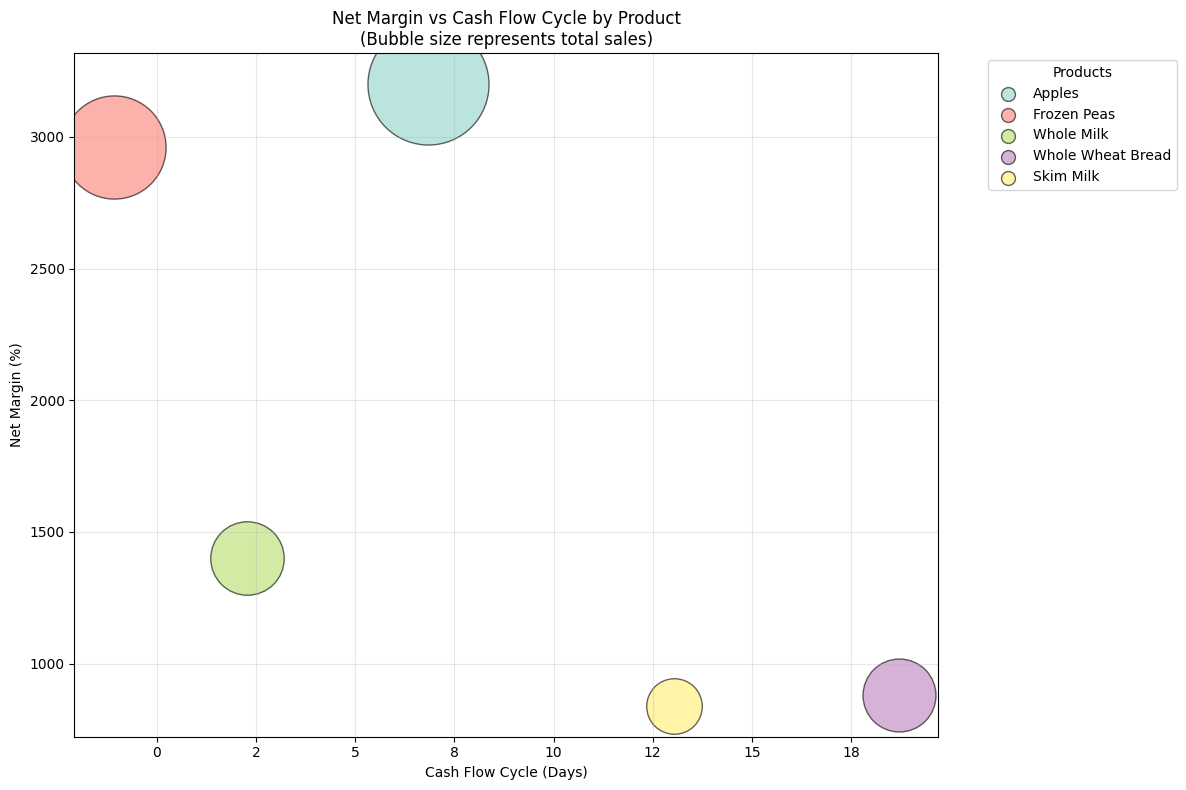

In [94]:
from sqlalchemy import create_engine
from matplotlib.ticker import FuncFormatter

def connect_db():
    engine = create_engine(f'postgresql://{DB_CONFIG["user"]}:{DB_CONFIG["password"]}@{DB_CONFIG["host"]}:{DB_CONFIG["port"]}/{DB_CONFIG["dbname"]}')
    return engine

def get_sales_data():
    query = """
    SELECT 
        p.product_name,
        SUM(s.units_sold) AS total_units_sold,
        SUM(s.gross_sales) AS total_gross_sales,
        SUM(s.discount) AS total_discounts,
        SUM(s.net_sales_after_returns) AS total_net_sales,
        SUM(s.gross_profit) AS total_gross_profit,
        AVG(s.gross_profit_margin) AS average_gross_profit_margin,
        AVG(p.inventory) AS average_inventory,
        SUM(s.cost_of_goods_sold) AS cost_of_goods_sold,
        SUM(s.accounts_receivable) AS accounts_receivable,
        SUM(s.accounts_payable) AS accounts_payable
    FROM Sales s
    JOIN Products p ON s.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY total_gross_profit DESC;
    """
    conn = connect_db()
    df = pd.read_sql_query(query, conn)
    return df

def get_promotion_data():
    query = """
    SELECT 
        p.product_name,
        SUM(s.gross_sales) AS total_sales,
        SUM(s.discount) AS total_discount,
        SUM(s.gross_profit) AS total_profit,
        SUM(s.gross_sales) AS total_gross_sales,
        AVG(s.gross_profit_margin) AS average_profit_margin
    FROM Sales s
    JOIN Products p ON s.product_id = p.product_id
    WHERE s.discount > 0
    GROUP BY p.product_name
    ORDER BY total_profit DESC;
    """
    engine = connect_db()
    df = pd.read_sql_query(query, engine)
    return df

def calculate_cash_flow_cycle(sales_df):
    # Calculate DIO, DSO, DPO
    sales_df['DIO'] = (sales_df['average_inventory'] / sales_df['cost_of_goods_sold']) * 365
    sales_df['DSO'] = (sales_df['accounts_receivable'] / sales_df['total_gross_sales']) * 365
    sales_df['DPO'] = (sales_df['accounts_payable'] / sales_df['cost_of_goods_sold']) * 365

    # Calculate Cash Flow Cycle
    sales_df['cash_flow_cycle'] = sales_df['DIO'] + sales_df['DSO'] - sales_df['DPO']
    
    # Calculate net margin
    sales_df['net_margin'] = sales_df['total_gross_sales'] - sales_df['cost_of_goods_sold'] 

    # Ensure total_sales is included
    sales_df['total_sales'] = sales_df['total_gross_sales']  - sales_df['total_discounts']

    return sales_df[['product_name', 'net_margin', 'cash_flow_cycle', 'total_sales']]

# Get data
promo_df = get_promotion_data()

# Display first few rows
print("Promotion Data Preview:")
display(promo_df.head())

# Calculate promotion metrics
print("\nPromotion Impact Analysis:")
total_sales = promo_df['total_sales'].sum()
if total_sales > 0:
    print(f"Average discount rate: {(promo_df['total_discount'].sum() / total_sales):.2%}")
    print(f"Total promotional sales: ${total_sales:,.2f}")
else:
    print("No promotional sales data available")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Calculate profit margin and discount margin
promo_df['profit_margin'] = promo_df['total_profit'] / promo_df['total_gross_sales']
promo_df['discount_margin'] = promo_df['total_discount'] / promo_df['total_gross_sales']

# Profit margin plot
sns.barplot(x='profit_margin', y='product_name', data=promo_df, ax=ax1, palette="coolwarm")
ax1.set_title('Promotional Profit Margin by Product')

# Discount margin plot
sns.barplot(x='discount_margin', y='product_name', data=promo_df, ax=ax2, palette="coolwarm")
ax2.set_title('Promotional Discount Margin by Product')

# Calculate medians for quadrant lines
median_discount_margin = promo_df['discount_margin'].median()
median_profit_margin = promo_df['profit_margin'].median()

# Create the quadrant plot
plt.figure(figsize=(12, 8))

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

# Add colored quadrants
max_discount_margin = promo_df['discount_margin'].max()
max_profit_margin = promo_df['profit_margin'].max()
min_discount_margin = promo_df['discount_margin'].min()
min_profit_margin = promo_df['profit_margin'].min()

# Create colored quadrants with low opacity
plt.fill_between([median_discount_margin, max_discount_margin * 1.25], median_profit_margin, max_profit_margin * 1.25, 
                 color='yellow', alpha=0.1)  # High Profit Margin, High Discount Margin
plt.fill_between([min_discount_margin * 0.9, median_discount_margin], median_profit_margin, max_profit_margin * 1.25, 
                 color='green', alpha=0.1)  # High Profit Margin, Low Discount Margin
plt.fill_between([median_discount_margin, max_discount_margin * 1.25], min_profit_margin * 0.75, median_profit_margin, 
                 color='red', alpha=0.1)  # Low Profit Margin, High Discount Margin
plt.fill_between([min_discount_margin * 0.9, median_discount_margin], min_profit_margin * 0.75, median_profit_margin, 
                 color='yellow', alpha=0.1)  # Low Profit Margin, Low Discount Margin

# Create color map for categories
categories = promo_df['product_name'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
color_dict = dict(zip(categories, colors))

# Plot bubbles for each category
for category in categories:
    mask = promo_df['product_name'] == category
    plt.scatter(promo_df[mask]['discount_margin'], 
               promo_df[mask]['profit_margin'],
               s=promo_df[mask]['total_sales'] * 1,
               c=[color_dict[category]],
               edgecolors='black',
               linewidth=1,
               alpha=0.6,
               label=category)

# Add median lines with subtle dashes
plt.axvline(x=median_discount_margin, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=median_profit_margin, color='gray', linestyle='--', alpha=0.5)

# Add quadrant labels
plt.text(max_discount_margin * 0.95, max_profit_margin * 0.95, 
         'High Profit Margin\nHigh Discount Margin', ha='right', va='top')
plt.text(min_discount_margin * 1.05, max_profit_margin * 0.95, 
         'High Profit Margin\nLow Discount Margin', ha='left', va='top')
plt.text(max_discount_margin * 0.95, min_profit_margin * 1.05, 
         'Low Profit Margin\nHigh Discount Margin', ha='right', va='bottom')
plt.text(min_discount_margin * 1.05, min_profit_margin * 1.05, 
         'Low Profit Margin\nLow Discount Margin', ha='left', va='bottom')

plt.title('Promotional Profit Margin vs Discount Margin by Product\n(Bubble size represents total sales)')
plt.xlabel('Discount Margin')
plt.ylabel('Profit Margin')
plt.grid(True, alpha=0.3)

# Create legend with consistent bubble sizes
legend_elements = [plt.scatter([], [], 
                             c=[color_dict[cat]], 
                             s=100,
                             edgecolors='black',
                             linewidth=1,
                             label=cat,
                             alpha=0.6) 
                  for cat in categories]

plt.legend(handles=legend_elements, 
          title='Products', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          scatterpoints=1)

plt.tight_layout()
plt.show()

# Get sales data
sales_df = get_sales_data()

print('Sales Data Preview:')
display(sales_df.head())

# Get cash flow cycle data
cash_flow_data = calculate_cash_flow_cycle(sales_df)

print('Cash Flow Data Preview:')
display(cash_flow_data.head())

# Create the new plot
plt.figure(figsize=(12, 8))

# Plotting net margin vs cash flow cycle
for category in categories:
    mask = cash_flow_data['product_name'] == category  # Ensure you have product_name in cash_flow_data
    plt.scatter(cash_flow_data[mask]['cash_flow_cycle'], 
                cash_flow_data[mask]['net_margin'], 
                s=cash_flow_data[mask]['total_sales'] * 1,  # Adjust size as needed
                c=[color_dict[category]],  # Use color from the color_dict
                edgecolors='black',
                linewidth=1,
                alpha=0.6,
                label=category)

# Format axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))  # Cash flow cycle in days
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))  # Net margin as percentage

plt.title('Net Margin vs Cash Flow Cycle by Product\n(Bubble size represents total sales)')
plt.xlabel('Cash Flow Cycle (Days)')
plt.ylabel('Net Margin (%)')
plt.grid(True, alpha=0.3)

# Create legend
plt.legend(handles=legend_elements, 
          title='Products', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          scatterpoints=1)

plt.tight_layout()
plt.show()

## 3. Financial Metrics Analysis

Recent Financial Metrics:


C:\Users\Intel\AppData\Local\Temp\ipykernel_62824\2899089399.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,division_name,date,gross_margin,operating_margin,net_margin,return_on_assets,return_on_equity,free_cash_flow
0,Dairy,2024-01-01,0.3500,0.1500,0.1000,0.2300,0.1200,500000.00
1,Dairy,2024-01-01,0.3500,0.1500,0.1000,0.1100,0.2200,500000.00
2,Frozen Foods,2023-12-01,0.1583,0.4176,0.4414,0.2265,0.2865,94503.83
3,Frozen Foods,2023-12-01,0.0802,0.4617,0.2855,0.2486,0.3432,5487.70
4,Frozen Foods,2023-12-01,0.2212,0.1130,0.3476,0.2224,0.2082,86239.58



Key Financial Indicators:


,gross_margin,operating_margin,net_margin
division_name,,,
Bakery,0.4938,0.0589,0.1033
Dairy,0.3500,0.1500,0.1000
Frozen Foods,0.1583,0.4176,0.4414
Produce,0.3503,0.0108,0.0140


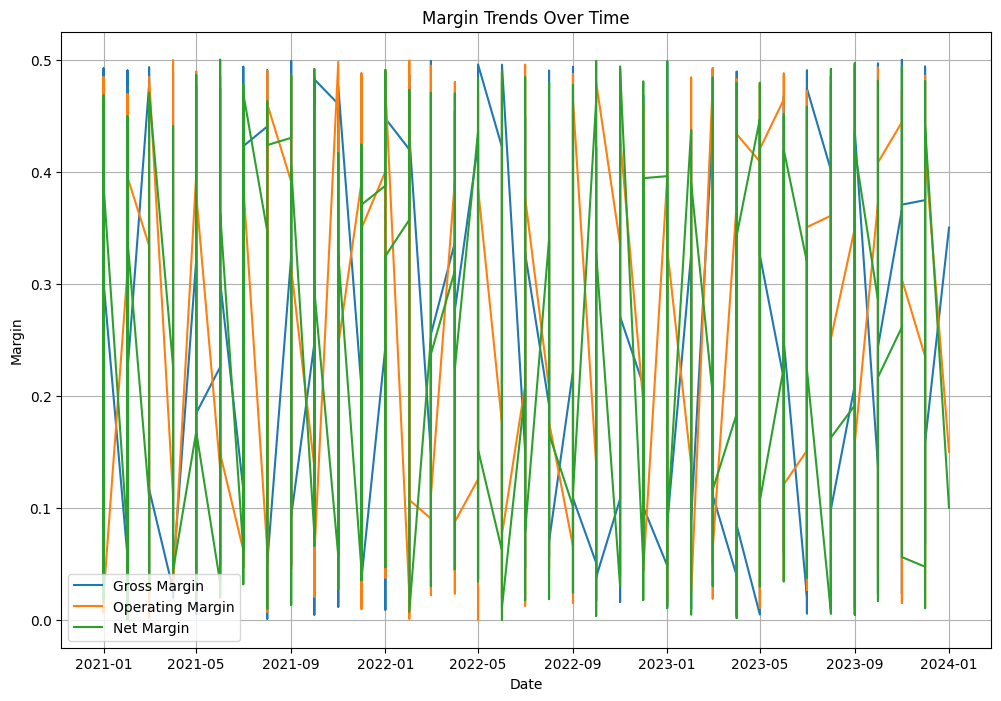

C:\Users\Intel\AppData\Local\Temp\ipykernel_62824\2899089399.py:56: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


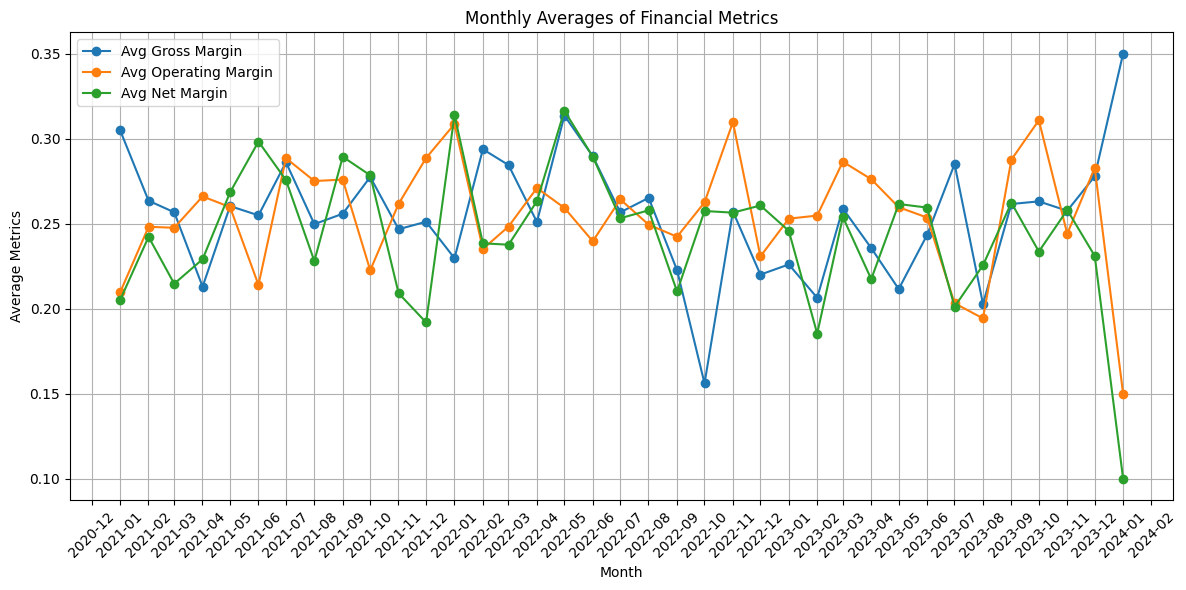

In [91]:
def get_financial_metrics():
    query = """
    SELECT 
        d.division_name,
        fm.date,
        fm.gross_margin,
        fm.operating_margin,
        fm.net_margin,
        fm.return_on_assets,
        fm.return_on_equity,
        fm.free_cash_flow
    FROM FinancialMetrics fm
    JOIN Divisions d ON fm.division_id = d.division_id
    ORDER BY fm.date DESC;
    """
    conn = connect_db()
    df = pd.read_sql_query(query, conn)
    return df

# Get data
metrics_df = get_financial_metrics()

# Display recent metrics
print("Recent Financial Metrics:")
display(metrics_df.head())

# Calculate key statistics
print("\nKey Financial Indicators:")
latest_metrics = metrics_df.groupby('division_name').first()
display(latest_metrics[['gross_margin', 'operating_margin', 'net_margin']])

# Plot trends
plt.figure(figsize=(12, 8))
for metric in ['gross_margin', 'operating_margin', 'net_margin']:
    plt.plot(metrics_df['date'], metrics_df[metric], label=metric.replace('_', ' ').title())

plt.title('Margin Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Margin')
plt.legend()
plt.grid(True)
plt.show()

def get_monthly_averages():
    query = """
    SELECT 
        DATE_TRUNC('month', fm.date) AS month,
        AVG(fm.gross_margin) AS avg_gross_margin,
        AVG(fm.operating_margin) AS avg_operating_margin,
        AVG(fm.net_margin) AS avg_net_margin
    FROM FinancialMetrics fm
    GROUP BY month
    ORDER BY month;
    """
    conn = connect_db()
    df = pd.read_sql_query(query, conn)
    return df

# Get monthly averages
monthly_avg_df = get_monthly_averages()

# Plotting seasonality
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_df['month'], monthly_avg_df['avg_gross_margin'], label='Avg Gross Margin', marker='o')
plt.plot(monthly_avg_df['month'], monthly_avg_df['avg_operating_margin'], label='Avg Operating Margin', marker='o')
plt.plot(monthly_avg_df['month'], monthly_avg_df['avg_net_margin'], label='Avg Net Margin', marker='o')

plt.title('Monthly Averages of Financial Metrics')
plt.xlabel('Month')
plt.ylabel('Average Metrics')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Pricing Efficiency Analysis

Pricing Analysis:


,product_name,total_units_sold,total_net_weight_tm,average_price_per_kg,average_profit_per_kg
0,Frozen Peas,1600,1.6,1.7000,0.8500
1,Apples,2000,2.0,1.8500,0.7000
2,Skim Milk,600,0.6,1.3333,0.6333
3,Whole Milk,1000,1.0,1.4000,0.6000
4,Whole Wheat Bread,1200,1.2,1.1333,0.3167


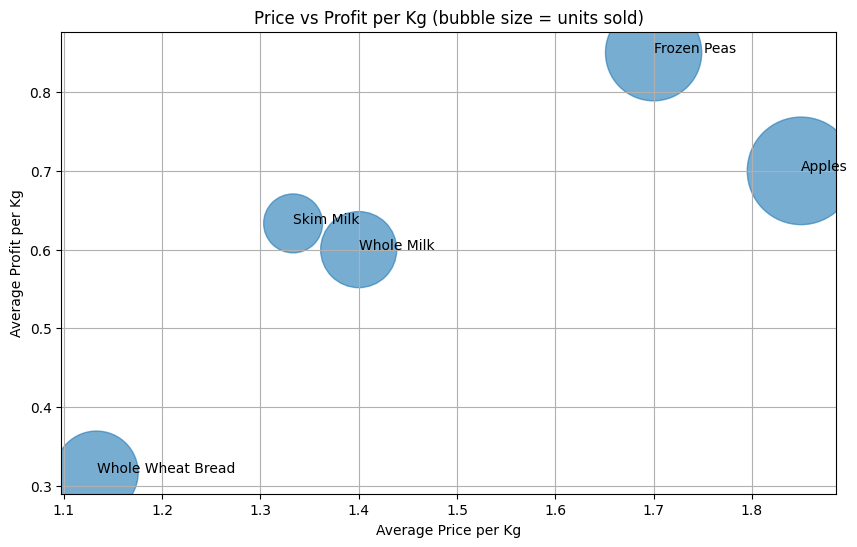


Pricing Efficiency Insights:
Most profitable product per kg: Frozen Peas
Highest margin product: Frozen Peas


In [79]:
def get_pricing_data():
    query = """
    SELECT 
        p.product_name,
        SUM(s.units_sold) AS total_units_sold,
        SUM(s.net_weight_tm) AS total_net_weight_tm,
        AVG(s.price_per_kg) AS average_price_per_kg,
        AVG(s.profit_per_kg) AS average_profit_per_kg
    FROM Sales s
    JOIN Products p ON s.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY average_profit_per_kg DESC;
    """
    conn = connect_db()
    df = pd.read_sql_query(query, conn)
    return df

# Get data
pricing_df = get_pricing_data()

# Display pricing analysis
print("Pricing Analysis:")
display(pricing_df)

# Calculate efficiency metrics
pricing_df['profit_margin_per_kg'] = pricing_df['average_profit_per_kg'] / pricing_df['average_price_per_kg']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(pricing_df['average_price_per_kg'], 
           pricing_df['average_profit_per_kg'], 
           s=pricing_df['total_units_sold']*3, 
           alpha=0.6)

# Add labels for each point
for i, txt in enumerate(pricing_df['product_name']):
    plt.annotate(txt, (pricing_df['average_price_per_kg'].iloc[i], 
                       pricing_df['average_profit_per_kg'].iloc[i]))

plt.title('Price vs Profit per Kg (bubble size = units sold)')
plt.xlabel('Average Price per Kg')
plt.ylabel('Average Profit per Kg')
plt.grid(True)
plt.show()

# Print efficiency insights
print("\nPricing Efficiency Insights:")
print(f"Most profitable product per kg: {pricing_df.iloc[0]['product_name']}")
print(f"Highest margin product: {pricing_df.sort_values('profit_margin_per_kg', ascending=False).iloc[0]['product_name']}")